## Better crypto libraries

- Uses ECDSA library which was optimized for x86. Compiled C code. Access using a Go interface.
- 40%-45% faster

_Go ECDSA_: support for all curves. Not optimized. https://golang.org/pkg/crypto/ecdsa/

_Bitcoin Core: optimized C library for curve secp256k1_. https://github.com/bitcoin-core/secp256k1
Example: Using 5 52-bit limbs (including hand-optimized assembly for x86_64, by Diederik Huys).

_ed25519_ for Go, optimized by oasislabs https://github.com/oasislabs/ed25519 https://ed25519.cr.yp.to/ Compared to Go ECDSA, it's **7-8 times** faster. 


**Remark**: Go ECDSA does not support key recovery.

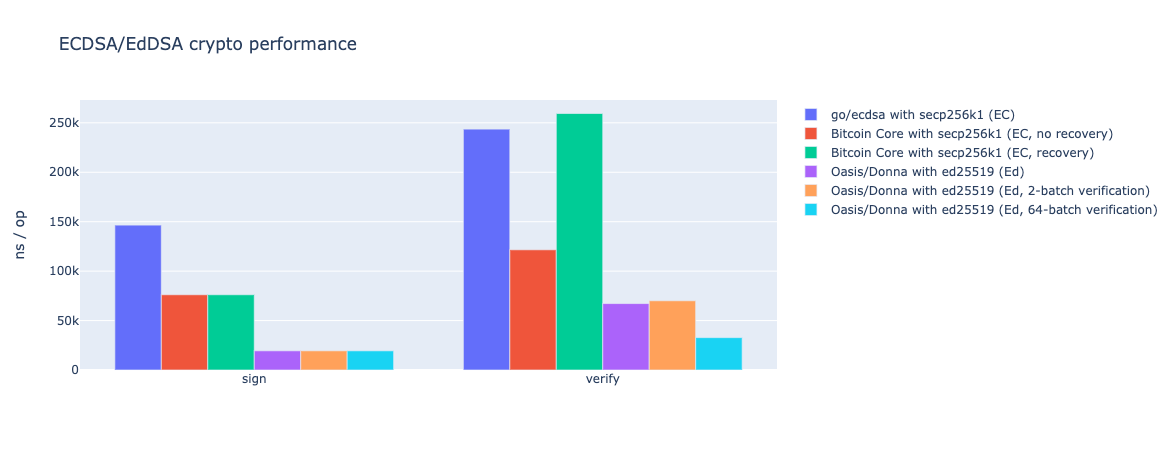

In [15]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

ops = pd.read_csv("ops.csv")

fig = go.Figure(data=[
    go.Bar(name='go/ecdsa with secp256k1 (EC)', x=ops["function"], y=ops["goEcdsa"]),
    go.Bar(name='Bitcoin Core with secp256k1 (EC, no recovery)', x=ops["function"], y=ops["secp256k1NoRecovery"]),
    go.Bar(name='Bitcoin Core with secp256k1 (EC, recovery)', x=ops["function"], y=ops["secp256k1Recovery"]),
    go.Bar(name='Oasis/Donna with ed25519 (Ed)', x=ops["function"], y=ops["ed25519"]),
    go.Bar(name='Oasis/Donna with ed25519 (Ed, 2-batch verification)', x=ops["function"], y=ops["ed255192BatchVerify"]),
    go.Bar(name='Oasis/Donna with ed25519 (Ed, 64-batch verification)', x=ops["function"], y=ops["ed2551964BatchVerify"]),
])
# Change the bar mode
fig.update_layout(title="ECDSA/EdDSA crypto performance", barmode='group', yaxis_title="ns / op")
fig.update_layout(xaxis_type='category', yaxis_type='linear')
fig.show()

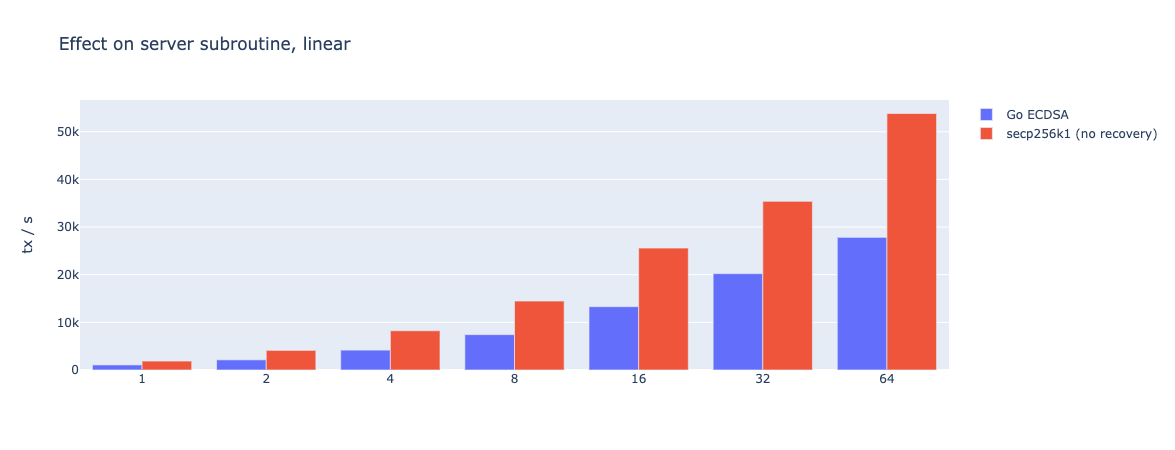

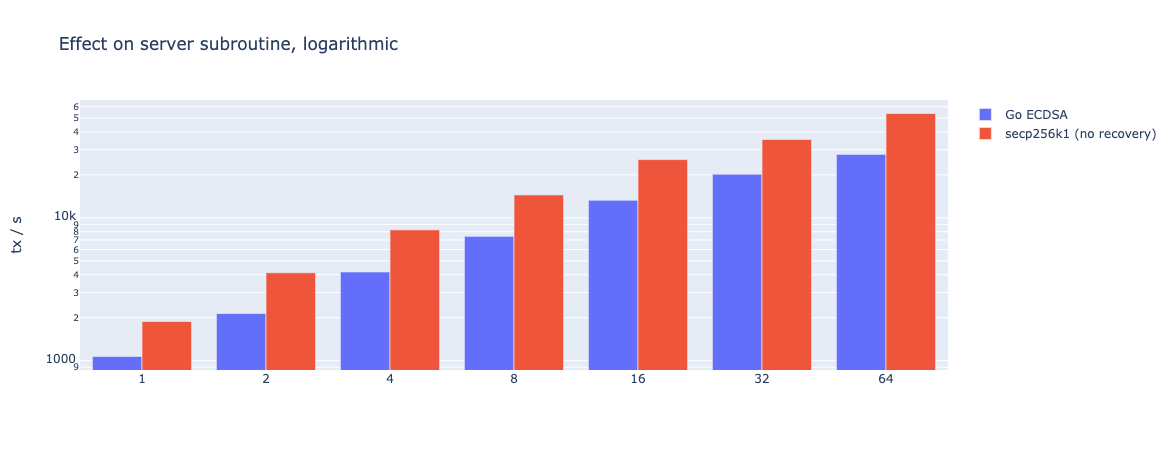

In [29]:
import plotly.graph_objects as go
import numpy as np
import pandas as pd

df0 = pd.read_csv("before.csv")
df1 = pd.read_csv("improved.csv")

fig = go.Figure(data=[
    go.Bar(name='Go ECDSA', x=df0["cpus"], y=1/(df0["nsop"]*10**-9)),
    go.Bar(name='secp256k1 (no recovery)', x=df1["cpus"], y=1/(df1["nsop"]*10**-9))
])
# Change the bar mode
fig.update_layout(title="Effect on server subroutine, linear", barmode='group', yaxis_title="tx / s")
fig.update_layout(xaxis_type='category', yaxis_type='linear')
fig.show()
fig.update_layout(title="Effect on server subroutine, logarithmic", yaxis_type='log')
fig.show()